importing libraries: Numpy, Pandas, and Matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data collection

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv')

In [ ]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)
print(df.dtypes)

Date                                                     int64
btc_market_price                                       float64
btc_total_bitcoins                                     float64
btc_market_cap                                         float64
btc_trade_volume                                       float64
btc_blocks_size                                        float64
btc_avg_block_size                                     float64
btc_n_orphaned_blocks                                    int64
btc_n_transactions_per_block                           float64
btc_median_confirmation_time                           float64
btc_hash_rate                                          float64
btc_difficulty                                         float64
btc_miners_revenue                                     float64
btc_transaction_fees                                   float64
btc_cost_per_transaction_percent                       float64
btc_cost_per_transaction                               

In [ ]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,733820,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,0.0,0.0,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,733821,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,0.0,0.0,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,733822,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,0.0,0.0,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,733823,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,0.0,0.0,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,733824,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,0.0,0.0,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [ ]:
print(df['btc_market_price'][1023])

13.6888


EDA

In [ ]:
import seaborn as sns

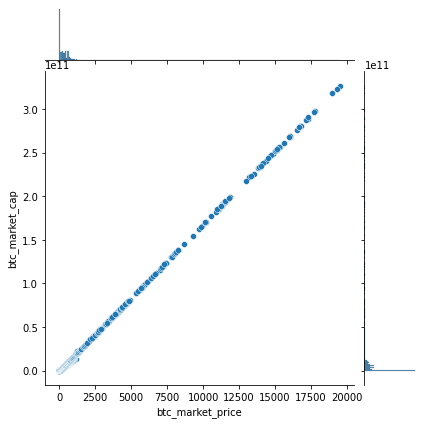

In [ ]:
sns.jointplot(x = "btc_market_price", y = "btc_market_cap", data = df)
plt.show()

Data Cleaning

In [ ]:
df.mean(axis = 0, skipna = True) 

Date                                                   7.352725e+05
btc_market_price                                       8.391042e+02
btc_total_bitcoins                                     1.151138e+07
btc_market_cap                                         1.344352e+10
btc_trade_volume                                       7.398381e+07
btc_blocks_size                                        3.550550e+04
btc_avg_block_size                                     3.503659e-01
btc_n_orphaned_blocks                                  3.640743e-01
btc_n_transactions_per_block                           6.716737e+02
btc_median_confirmation_time                           7.501113e+00
btc_hash_rate                                          1.244070e+06
btc_difficulty                                         1.606360e+11
btc_miners_revenue                                     2.184353e+06
btc_transaction_fees                                   6.043450e+01
btc_cost_per_transaction_percent                

In [ ]:
df["btc_market_cap"].fillna(1.344352, inplace = True)
df["btc_n_transactions"].fillna(1.020811, inplace = True)
df["btc_miners_revenue"].fillna(2.184353, inplace = True)
df["btc_cost_per_transaction"].fillna(1.463913, inplace = True)
df["btc_difficulty"].fillna(1.606360, inplace = True)
df["btc_hash_rate"].fillna(1.244070, inplace = True)
df["btc_cost_per_transaction_percent"].fillna(6.674782, inplace = True)

Model Formulation and Prediction

In [ ]:
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols(formula='btc_market_price ~ btc_market_cap + btc_n_transactions + btc_miners_revenue + btc_cost_per_transaction + btc_difficulty + btc_hash_rate + btc_cost_per_transaction_percent', data=df).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import sklearn.metrics as sm
y = model.predict(df[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

print("MSE:", sm.mean_squared_error(y, df['btc_market_price'].values))

MSE: 406.88786544155295


In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/test_set.csv')

test_predict = model.predict(test[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

for i in range(0,len(test_predict)):
    print("The price on "+ str(i+1) +" february is "+ str(test_predict[i]))

The price on 1 february is 9058.82085877089
The price on 2 february is 8899.569160021707
The price on 3 february is 9120.376645655017
The price on 4 february is 8466.204855810383
The price on 5 february is 6800.535950413565
The price on 6 february is 7624.492849879038
The price on 7 february is 8074.826097337471
The price on 8 february is 8262.66323279681
The price on 9 february is 8560.438164890766
The price on 10 february is 8336.076378723325
The price on 11 february is 8427.028216870633
The price on 12 february is 8836.960444161505
The price on 13 february is 8624.403882857277
The price on 14 february is 9362.844466002192
